In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train = train.drop(['description','designation','province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title'],axis=1)
test = test.drop(['description','designation','province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title'],axis=1)


In [11]:
train.head()

,country,points,price,variety,winery,id
0,Portugal,88.870874,20.0,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,88.041695,28.0,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,94.085021,130.0,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,89.869797,34.0,PETITE SIRAH,Jaffurs,124405
4,US,89.017651,24.0,ROSé,Syncline,33649


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 14 columns):
country                  174953 non-null object
description              175000 non-null object
designation              122734 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 174953 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82189 non-null object
variety                  174999 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 18.7+ MB


In [5]:
train.describe()

,points,price,id
count,175000.000000,175000.000000,175000.000000
mean,88.083987,34.304400,70684.047240
std,3.157001,38.398146,41341.638798
min,79.636128,4.000000,1.000000
25%,85.971283,16.000000,35020.000000
50%,87.981631,25.000000,70256.500000
75%,90.085631,40.000000,105550.250000
max,100.220603,2500.000000,150929.000000


In [6]:
train.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'id'],
      dtype='object')

In [7]:
# show .....

In [8]:
train['country'].value_counts()

US                        79129
Italy                     24194
France                    22060
Spain                      9993
Chile                      6893
Argentina                  6323
Portugal                   6066
Australia                  4847
Austria                    3508
New Zealand                3039
Germany                    2950
South Africa               2405
Greece                      903
Israel                      727
Canada                      308
Hungary                     255
Romania                     179
Bulgaria                    146
Uruguay                     124
Slovenia                    116
Turkey                      101
Croatia                      98
Mexico                       86
Georgia                      85
Moldova                      82
Brazil                       58
England                      54
Lebanon                      50
Morocco                      30
Cyprus                       29
Macedonia                    18
Serbia  

In [9]:
train['province'].value_counts()

California                                54692
Washington                                12404
Tuscany                                    7463
Oregon                                     6741
Northern Spain                             5834
Mendoza Province                           5372
Bordeaux                                   4520
Burgundy                                   4408
Piedmont                                   4096
Veneto                                     3666
New York                                   3474
South Australia                            2880
Northeastern Italy                         2604
Sicily & Sardinia                          2461
Alsace                                     2360
Loire Valley                               2030
Southwest France                           1787
Catalonia                                  1689
Champagne                                  1685
Marlborough                                1613
Southern Italy                          

In [10]:
train['taster_twitter_handle'].value_counts()

@vossroger          13694
@wineschach         10177
@kerinokeefe         6706
@vboone              6473
@paulgwine           6446
@mattkettmann        4233
@JoeCz               3408
@wawinereport        3344
@gordone_cellars     2884
@AnneInVino          2246
@laurbuzz            1137
@suskostrzewa         752
@worldwineguys        665
@bkfiona               20
@winewchristina         5
Name: taster_twitter_handle, dtype: int64

In [11]:
train['variety'].value_counts()

PINOT NOIR                       18031
CHARDONNAY                       16845
CABERNET SAUVIGNON               15035
RED BLEND                        12125
SAUVIGNON BLANC                   7352
RIESLING                          6859
BORDEAUX-STYLE RED BLEND          6722
SYRAH                             6623
MERLOT                            5456
ZINFANDEL                         4416
ROSé                              3875
MALBEC                            3846
SANGIOVESE                        3499
WHITE BLEND                       3196
TEMPRANILLO                       2932
PORTUGUESE RED                    2716
NEBBIOLO                          2634
SPARKLING BLEND                   2630
RHôNE-STYLE RED BLEND             1925
SHIRAZ                            1848
PINOT GRIS                        1805
CABERNET FRANC                    1780
PINOT GRIGIO                      1548
CHAMPAGNE BLEND                   1509
VIOGNIER                          1500
GRüNER VELTLINER         

In [12]:
train['taster_name'].value_counts()

Roger Voss            13694
Michael Schachner     10177
Kerin O’Keefe          6706
Virginie Boone         6473
Paul Gregutt           6446
Matt Kettmann          4233
Joe Czerwinski         3408
Sean P. Sullivan       3344
Anna Lee C. Iijima     2924
Jim Gordon             2884
Anne Krebiehl MW       2246
Lauren Buzzeo          1137
Susan Kostrzewa         752
Mike DeSimone           339
Jeff Jenssen            326
Alexander Peartree      287
Carrie Dykes            108
Fiona Adams              20
Christina Pickard         5
Name: taster_name, dtype: int64

In [13]:
train['taster_twitter_handle'].value_counts()

@vossroger          13694
@wineschach         10177
@kerinokeefe         6706
@vboone              6473
@paulgwine           6446
@mattkettmann        4233
@JoeCz               3408
@wawinereport        3344
@gordone_cellars     2884
@AnneInVino          2246
@laurbuzz            1137
@suskostrzewa         752
@worldwineguys        665
@bkfiona               20
@winewchristina         5
Name: taster_twitter_handle, dtype: int64

In [14]:
train['winery'].value_counts()

Williams Selyem                       386
Testarossa                            347
DFJ Vinhos                            304
Chateau Ste. Michelle                 282
Concha y Toro                         254
Columbia Crest                        245
Wines & Winemakers                    244
Louis Latour                          232
Kendall-Jackson                       226
Joseph Drouhin                        204
Trapiche                              201
De Loach                              189
Gary Farrell                          189
Kenwood                               185
Errazuriz                             177
Santa Ema                             175
Robert Mondavi                        175
D'Arenberg                            174
Cameron Hughes                        174
Montes                                174
Martin Ray                            167
Morgan                                163
Iron Horse                            162
Bouchard Père & Fils              

In [15]:
train['title'].value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                                         8
Korbel NV Brut Sparkling (California)                                                          7
Ruinart NV Brut Rosé  (Champagne)                                                              6
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                                           6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)                             6
Boizel NV Brut Réserve  (Champagne)                                                            6
Chandon NV Rosé Sparkling (California)                                                         5
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                                        5
Segura Viudas NV Extra Dry Sparkling (Cava)                                                    5
Korbel NV Blanc de Noirs Sparkling (California)                                                4
A.R. Lenoble  NV Intense Brut 

In [25]:
train['price'].value_counts()

20.0      10092
15.0       8811
25.0       7909
18.0       7337
30.0       7021
12.0       6061
10.0       5823
13.0       5464
35.0       5453
40.0       5335
16.0       5187
22.0       4861
14.0       4831
50.0       4582
17.0       4410
45.0       4332
28.0       4284
24.0       4278
19.0       4133
11.0       3480
60.0       2997
32.0       2827
55.0       2536
9.0        2503
38.0       2389
23.0       2359
26.0       2356
65.0       2103
75.0       2014
36.0       1942
          ...  
569.0         1
226.0         1
412.0         1
303.0         1
602.0         1
183.0         1
306.0         1
575.0         1
256.0         1
2500.0        1
318.0         1
480.0         1
675.0         1
469.0         1
388.0         1
790.0         1
272.0         1
467.0         1
243.0         1
530.0         1
470.0         1
767.0         1
234.0         1
2000.0        1
282.0         1
612.0         1
428.0         1
698.0         1
319.0         1
540.0         1
Name: price, Length: 387

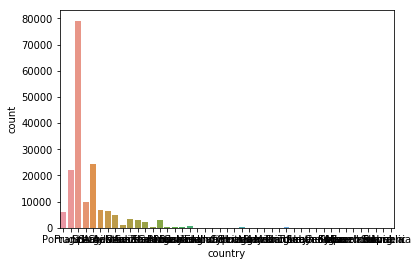

In [30]:
sns.countplot(train['country'])

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


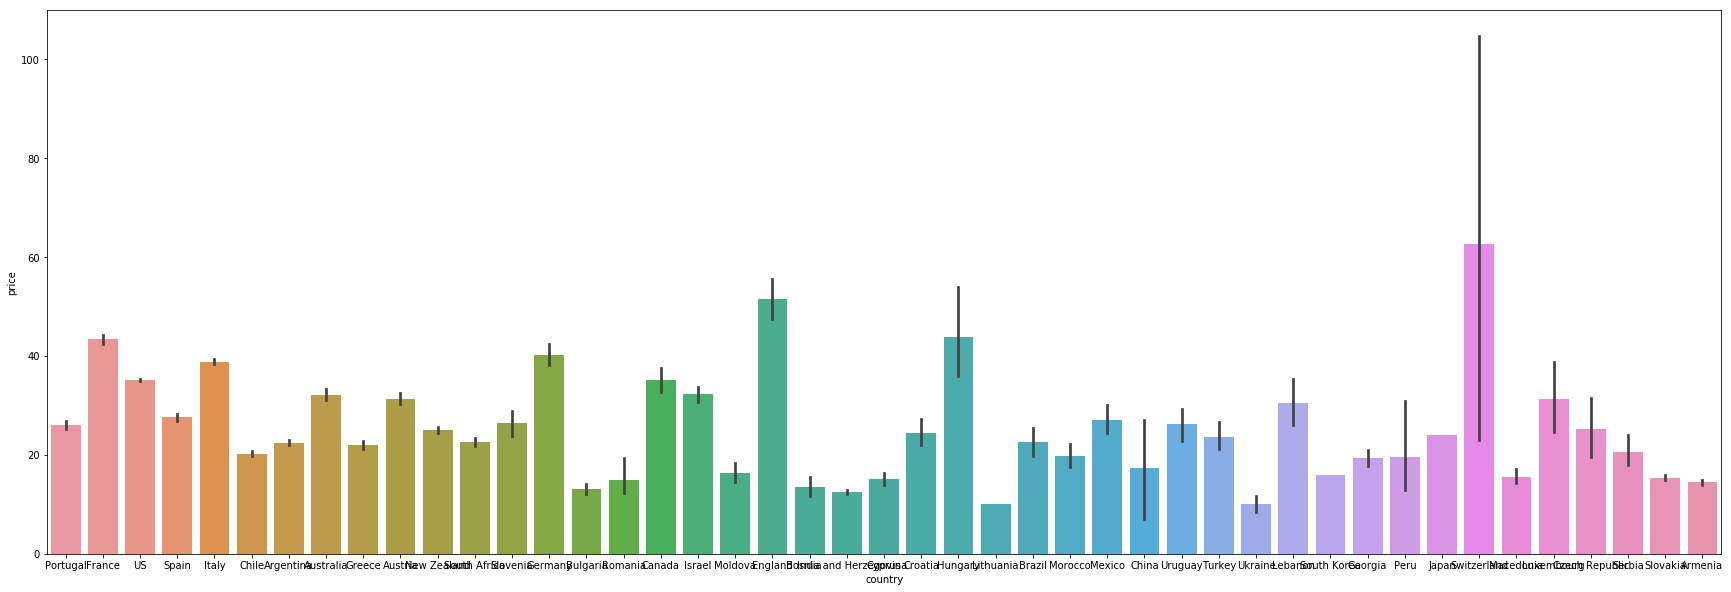

In [22]:
fig = plt.figure(figsize = (30,10))

sns.barplot(x=train['country'],y=train['price'], data=train)
# sns.countplot(train['country'])

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

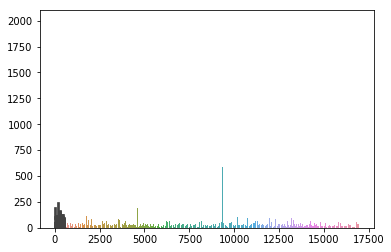

In [31]:
sns.barplot(x='winery',y='price', data=train)

In [23]:
# sns.pairplot(train, vars = ['price', 'country', 'winery', 'variety', 'taster_name'], dropna = True, hue='id')

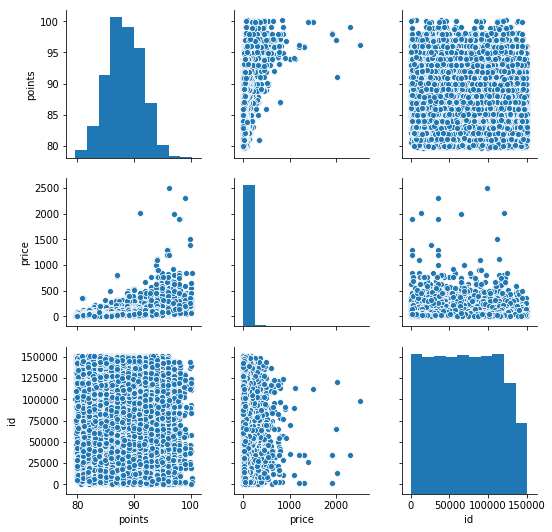

In [12]:
sns.pairplot(train)

In [ ]:
sns.jointplot(y='price',x='country',data=train)

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


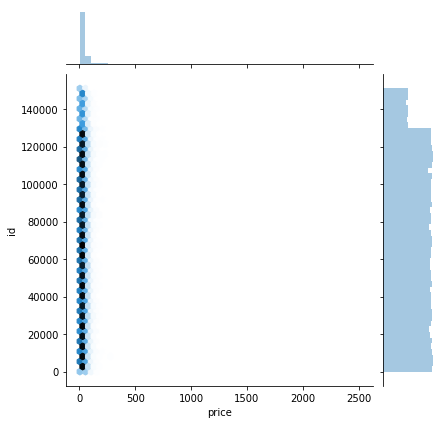

In [10]:
sns.jointplot(y='id',x='price',data=train,kind='hex')

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


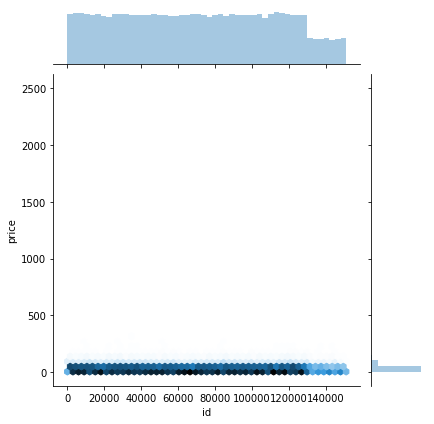

In [28]:
sns.jointplot(x='id',y='price',data=train,kind='hex')

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


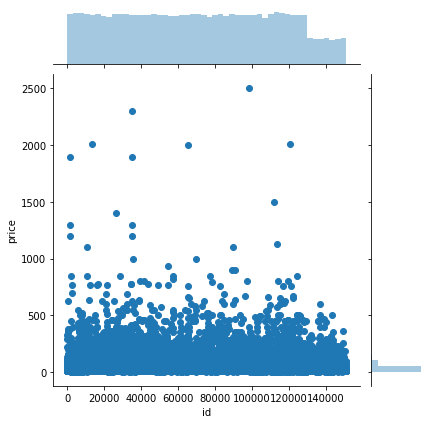

In [29]:
sns.jointplot(x='id',y='price',data=train)

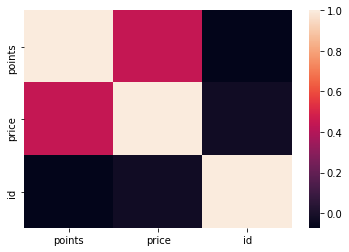

In [6]:
sns.heatmap(train.corr())

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


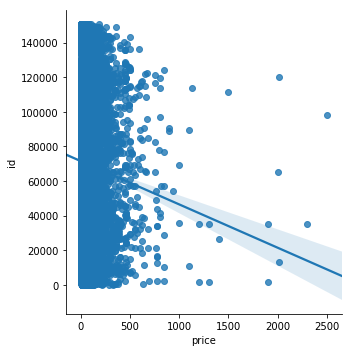

In [30]:
sns.lmplot(y='id',x='price', data=train)

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


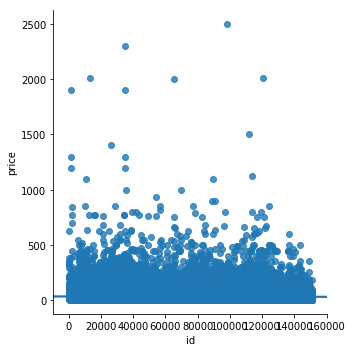

In [31]:
sns.lmplot(y='price',x='id', data=train)

# Training

In [27]:
x = ['points']
y = 'price'

In [28]:
# x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.4)
train[x].head(3)


,points
0,88.870874
1,88.041695
2,94.085021


In [29]:
lm = LinearRegression()
# lm.fit(x_train, y_train)
lm.fit(train[x], train[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(lm.intercept_)

-440.6007474646801


In [31]:
# predictions = lm.predict(x_test)
# sns.scatterplot(y_test, predictions)
predictions = lm.predict(test[x])


In [118]:
# print('MSR', mean_squared_error(y_test, predictions) )

MSR 1285.3586414052274


In [ ]:
# coeff = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
# coeff

In [32]:
predictions

array([71.7887325 , 49.84496612, 39.05092317, ..., 39.55355493,
       17.18056112, 55.62625702])

In [133]:
# test_prediction = lm.predict(test[['points']])

In [33]:
submission = pd.DataFrame({'id':test['id'] ,'price':predictions})

In [34]:
submission.head()

,id,price
0,0,71.788732
1,1,49.844966
2,2,39.050923
3,3,44.420851
4,4,34.258649


In [36]:
fileName = 'submission.csv'
submission.to_csv(fileName, index=False)

In [70]:
train.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [71]:
test.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4
